In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning : Arboles de decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics

# Dataset
train = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/titanic_train.csv")


In [31]:
# Nombres de las columnas
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
# Valores faltantes
train.isnull().sum().sort_values(ascending=False)*100/train.shape[0]

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [33]:
# Eliminemos las columnas :
  # PassengerId
  # Name
  # Cabin
  # Ticket

# El metodo pop
train.pop("Cabin")
train.pop("Ticket")
train.pop("Name")
train.pop("PassengerId")

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [34]:
# Rellenemos los valores faltantes : Age (numerica: mean) y Embarked (cualitativa: moda)
train.Age = train.Age.fillna(train.Age.mean())
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])


In [35]:
# Transformemos esta columna a una variables de tipo str
train.Pclass = train.Pclass.apply(str)


In [36]:
train.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [37]:
# Construyamos un primer modelo (Arbol de decision) para nuestro dataset train

# Variable Dependientes y Variables Independientes
labels = train.pop("Survived")
features = train

# One-Hot-Encoding a las columnas de features
for col in features.dtypes[features.dtypes == "object"].index:
  # Borramos la columna de tipo object y lo almacenamos en un objeto de tipo Series
  Col4Dummy = features.pop(col)
  features = pd.concat([features, pd.get_dummies(Col4Dummy, prefix = col)], axis = 1)


# Particionamiento
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(features, labels,
                                                                        test_size= 0.2)

# Instanciamos la clase DecisionTreeClassifier
ModelDt1 = DecisionTreeClassifier()

# Ajustamos el modelo usando los datos de entrenamiento
ModelDt1.fit(X_entrenamiento, y_entrenamiento)
# Calcula los parametros del modelo

# Calculemos un score del modelo : R2
ModelDt1_R2 = ModelDt1.score(X_entrenamiento, y_entrenamiento)

# Calculemos pronosticos de la variable dependiente
y_model = ModelDt1.predict(X_prueba)

# Calculemos 3 indicadores de calidad
MatrizConf_Dt1 = metrics.confusion_matrix(y_prueba, y_model)
Precision_Dt1 = metrics.accuracy_score(y_prueba, y_model)
# AUC : Area under curve (Area bajo la curva)
FalsePositiveRate, TruePositiveRate, Thresholds = metrics.roc_curve(y_prueba, y_model)
AUC_Dt1 = metrics.auc(FalsePositiveRate, TruePositiveRate)

# Mostremos los indicadores de calidad
print("Matriz de Confusion \n" , MatrizConf_Dt1 )
print("Accuracy \n", Precision_Dt1)
print("AUC \n", AUC_Dt1)

Matriz de Confusion 
 [[92 15]
 [26 46]]
Accuracy 
 0.770949720670391
AUC 
 0.7493509865005191


In [39]:
# Visualicemos el modelo
from sklearn.tree import export_text
print(export_text(ModelDt1))

|--- feature_8 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_0 <= 3.00
|   |   |   |--- feature_3 <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  88.78
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  3.00
|   |   |   |--- feature_3 <= 29.36
|   |   |   |   |--- feature_3 <= 28.23
|   |   |   |   |   |--- feature_0 <= 55.50
|   |   |   |   |   |   |--- feature_0 <= 25.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  25.50
|   |   |   |   |   |   |   |--- feature_0 <= 27.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  27.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 37.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  37.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 39.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  39.00
|   |   |   

In [41]:
# Guardemos en disco duro el archivo de texto que almacena nuestro modelo
ModelDt1_text = export_text(ModelDt1)
with open("ModelDt1_texto", "w") as SalidaEstimadorDt1:
  SalidaEstimadorDt1.write(ModelDt1_text)

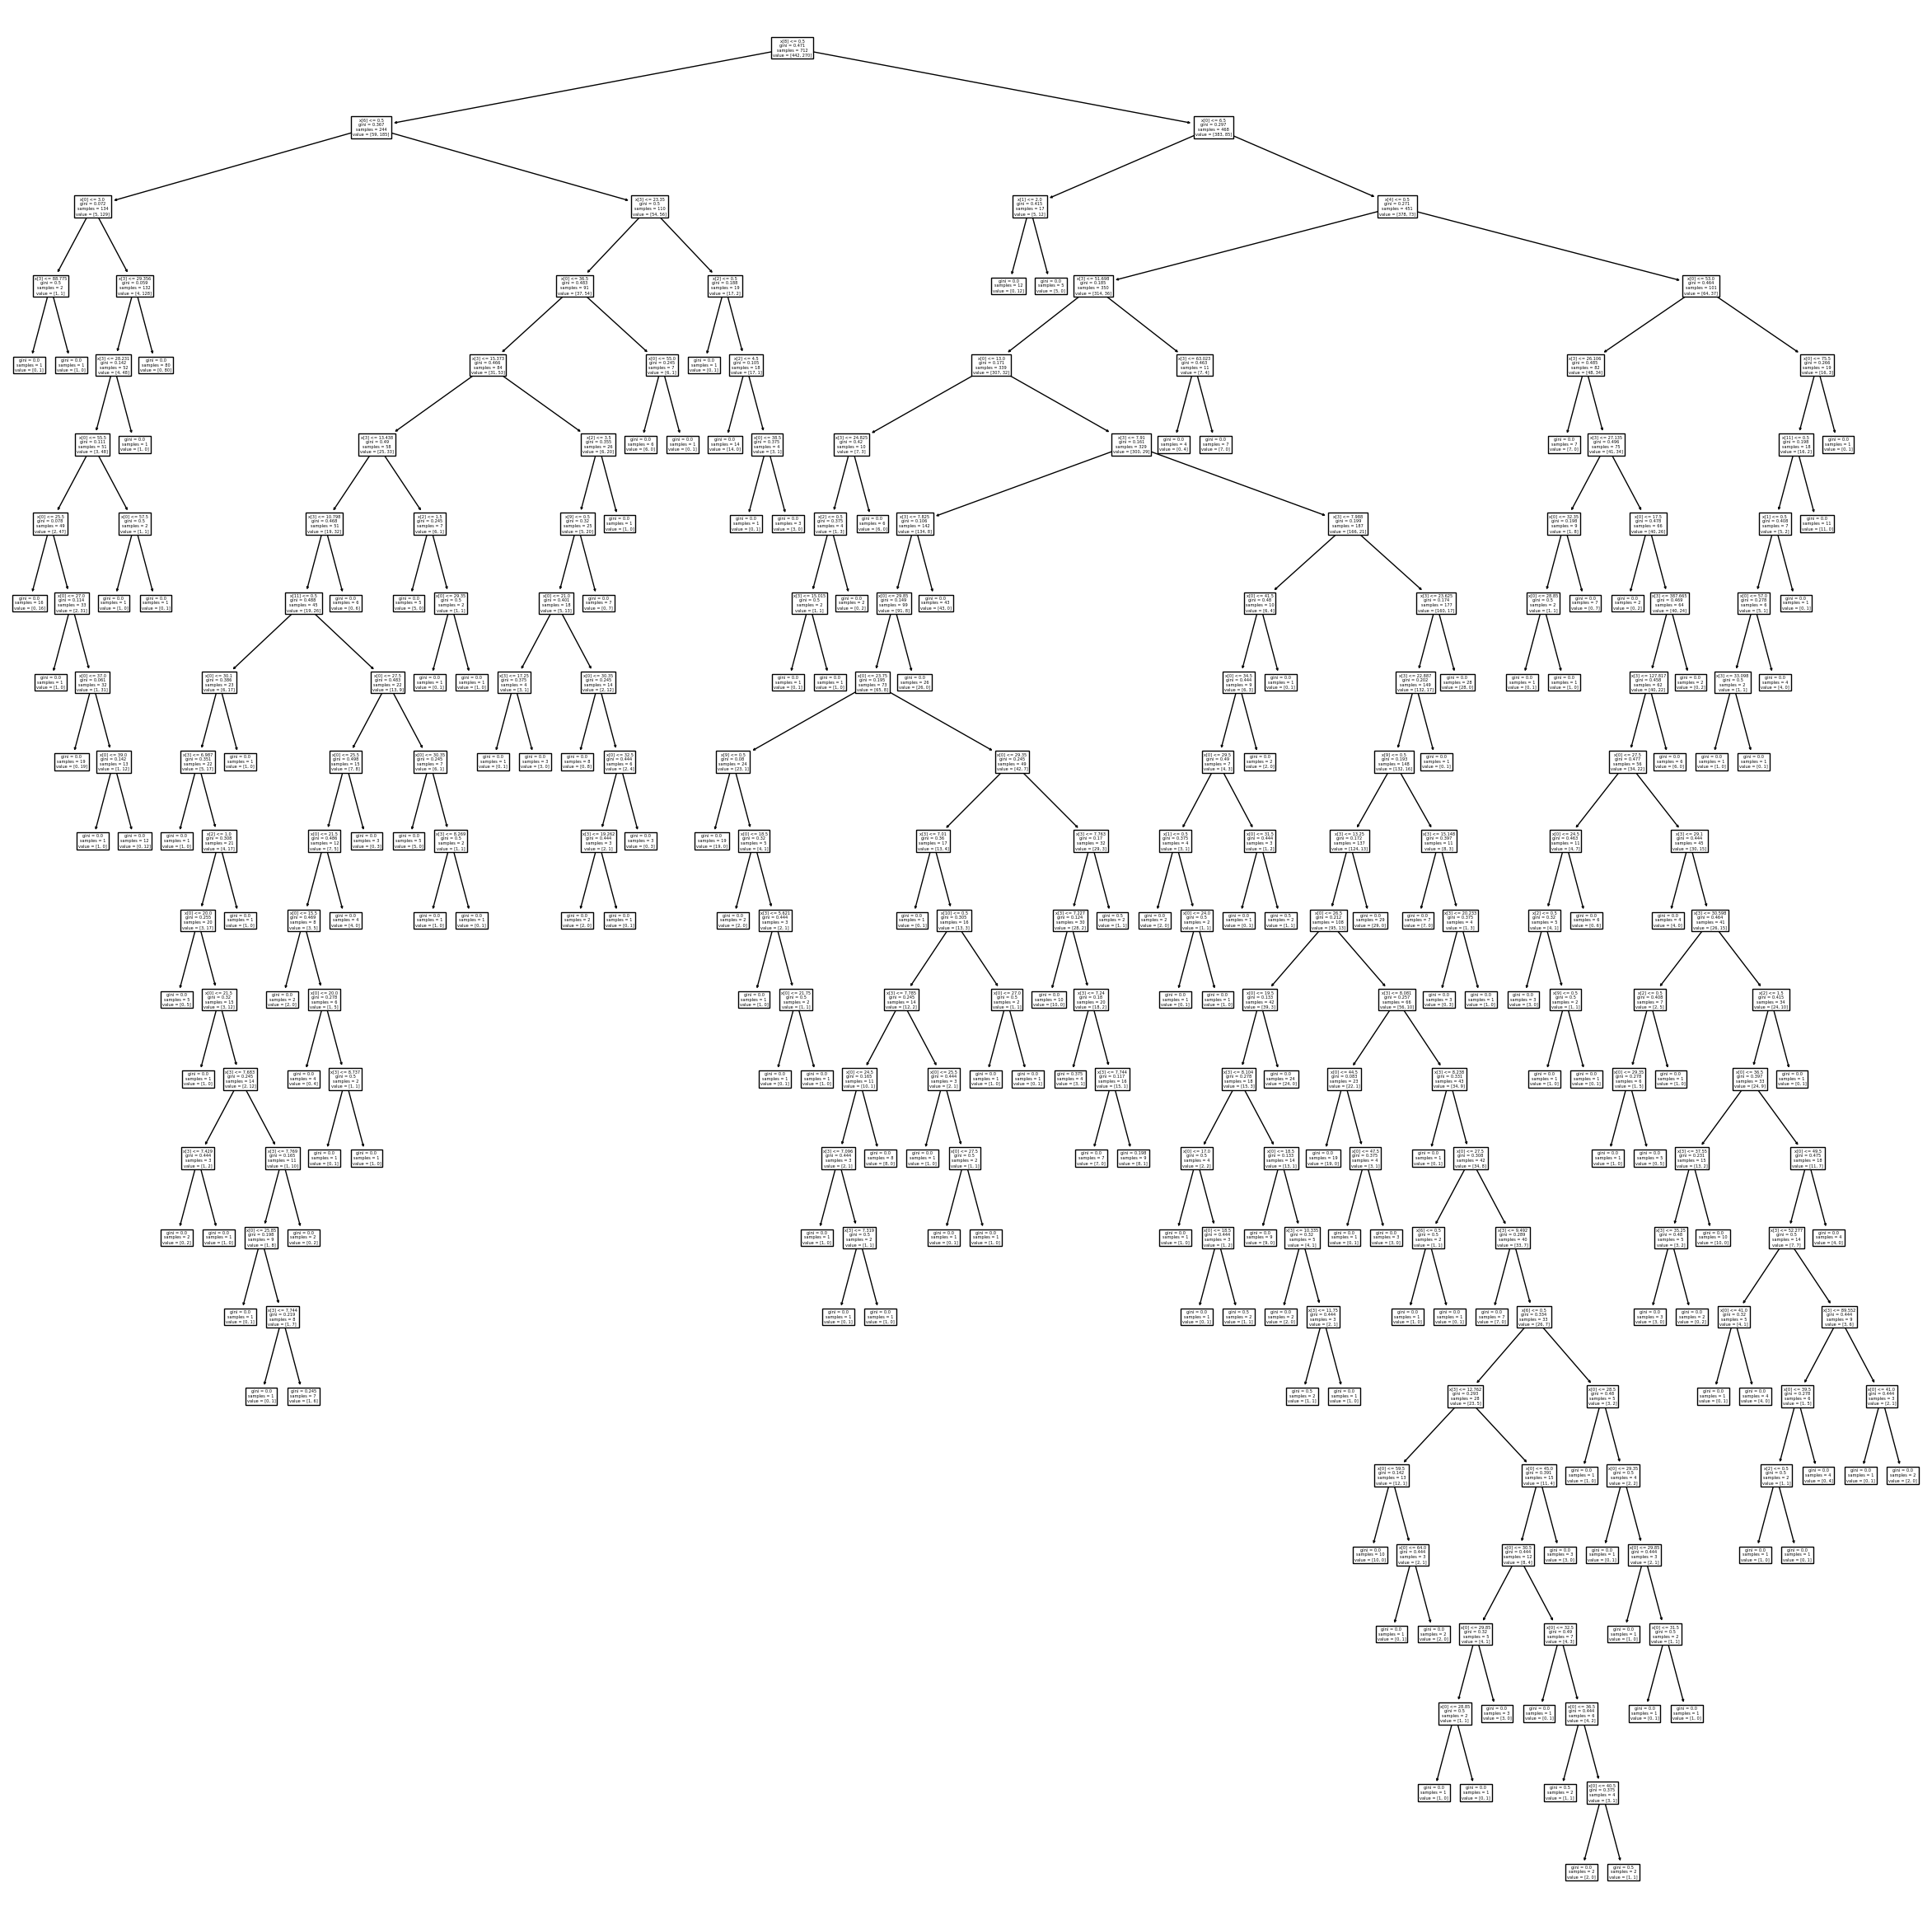

In [44]:
# Busquemos hacer un grafico del modelo
from sklearn.tree import plot_tree
plt.figure(figsize = (30,30))
plot_tree(ModelDt1)
plt.savefig("ModelDt1_Base.png",
            dpi = 600)

In [45]:
# Lista de metodos de ModelDt1
dir(ModelDt1)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'ma

In [46]:
# Profundidad del arbol
ModelDt1.get_depth()

23

In [47]:
# Parametros del modelo
ModelDt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [55]:
# Procedimiento de barrido de Hiperparametro : max_depth

# Definamos el espacio de busqueda para max_depth
# EspMaxProf = np.linspace(2, 55, 54, endpoint=True, dtype=int)
EspMaxProf = np.linspace(56, 100, 45, endpoint=True, dtype=int)


# Lista de AUC
Lista_AUC = []

# Estructura repetitiva
for MaxProfundidad in EspMaxProf:
  # Instanciamos la clase a modelar
  dt = DecisionTreeClassifier(max_depth = MaxProfundidad)
  # Ajustamos el arbol
  dt.fit(X_entrenamiento, y_entrenamiento)
  # Calculemos pronosticos
  y_forecast = dt.predict(X_prueba)
  # Calculemos el AUC
  falsepositiverate, truepositiverate, _ = metrics.roc_curve(y_prueba, y_forecast)
  AUC_dt = metrics.auc(falsepositiverate, truepositiverate)
  # Almacenamos algunos elementos para auditar los resultados
  Lista_AUC.append(AUC_dt)

# Construyamos un diccionarios
d = pd.DataFrame({"Profundidad": EspMaxProf,"AUC": Lista_AUC})
d.sort_values(by = "AUC",ascending=False)

Profundidad       AUC
3            59  0.770314
39           95  0.765641
9            65  0.765641
8            64  0.763370
28           84  0.760968
10           66  0.760968
25           81  0.760968
37           93  0.760968
16           72  0.760968
1            57  0.758697
4            60  0.758697
18           74  0.758697
32           88  0.756425
44          100  0.756295
19           75  0.756295
38           94  0.756295
11           67  0.756295
43           99  0.756295
2            58  0.756295
34           90  0.754024
31           87  0.754024
42           98  0.754024
29           85  0.754024
26           82  0.754024
0            56  0.754024
24           80  0.754024
15           71  0.754024
5            61  0.754024
41           97  0.751752
35           91  0.751752
17           73  0.751623
6            62  0.751623
30           86  0.749351
20           76  0.749351
33           89  0.749351
14           70  0.749351
23           79  0.749351
36           92  0.749351
13           69  0.749351
7            63  0.749351
40           96  0.749351
27           83  0.749351
12           68  0.747079
21           77  0.747079
22           78  0.744678

In [61]:
# Realicemos un barrido de Hiperparametros : GridSearch
from sklearn.model_selection import GridSearchCV

# Definamos un modelo base
ModTreeBase4GS = DecisionTreeClassifier()

# Diccionario que define el espacio de busqueda
DictHP_Dt1 = {"criterion": ["gini", "entropy", "log_loss"],
              "splitter": ["best", "random"],
              "max_depth": [3,5,7,11,15,55,57,61,63,70],
              "min_samples_split" : np.linspace(0.1, 0.9, 10),
              "min_samples_leaf" :np.linspace(0.1, 0.9, 10) }

# Realicemos el barrido de hiperparametros
ModTreeBase_gs = GridSearchCV(estimator = ModTreeBase4GS,
                              param_grid = DictHP_Dt1,
                              verbose = 4,
                              cv = 3,
                              n_jobs = -1,
                              scoring = "accuracy"
                              )

# Ajuste de todos los modelos
import time
inicio = time.time()
HistoriaAjuste = ModTreeBase_gs.fit(X_entrenamiento, y_entrenamiento)
fin = time.time()
print("Tiempo de Procesamiento ", fin-inicio)


Fitting 3 folds for each of 6000 candidates, totalling 18000 fits
Tiempo de Procesamiento  134.56476640701294


In [62]:
# Lista de metodos de HistoriaAjuste
dir(HistoriaAjuste)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'i

In [63]:
HistoriaAjuste.best_score_

0.7976692786819369

In [64]:
HistoriaAjuste.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3666666666666667,
 'splitter': 'best'}

In [65]:
# Guardemos este mejor modelo
import pickle
MejorModelo = HistoriaAjuste.best_estimator_
MejorModelo.fit(X_entrenamiento, y_entrenamiento)
ArchivoArbol = "MejorArbol_AbrahamZamudio.pkl"
with open(ArchivoArbol,"wb") as filearbol:
  pickle.dump(MejorModelo,filearbol)

In [66]:
# En vista de que con un arbolito de decision no podemos mejorar mucho nuestro
# poder predictivo, EVOLUCIONAMOS => RandomForest
from sklearn.ensemble import RandomForestClassifier

# Modelo
BosqueTitanicBase = RandomForestClassifier()

# Ajuste
BosqueTitanicBase.fit(X_entrenamiento, y_entrenamiento)

# Pronosticos
y_model_bosque = BosqueTitanicBase.predict(X_prueba)

# INdacador de calidad : AUC
FP, TP, _ = metrics.roc_curve(y_prueba, y_model_bosque)
AUC_bosque1 = metrics.auc(FP, TP)
AUC_bosque1

0.7980919003115265